In [1]:
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import to_categorical
from keras.models import load_model
from src.dataset_builders.cnn_rnn_data import CnnRnnData
from src import cnn_rnn as nn

def show(arr):
    plt.imshow(arr, cmap="gray")
    plt.show()


path_model = "../data/cnn_rnn_128_noise_padded.h5"
(x_train, y_train), (x_test, y_test) = CnnRnnData().noise_padded_data

/Users/i862304/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


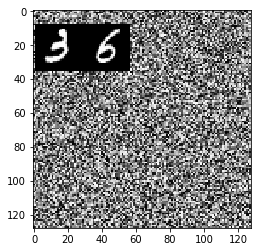

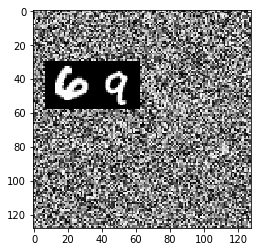

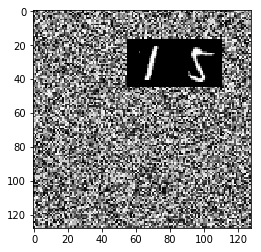

In [2]:
for im in x_test[:3]:
    show(im)

In [3]:
# from src.nn_settings.cnn_rnn_config import Config
from src.nn_settings.cnn_rnn_config import CnnRnnConfig

# keras_shape = (-1, 28, 56, 1)
keras_shape = (-1, 128, 128, 1)
input_encoding = x_train.reshape(keras_shape)
output_encoding = to_categorical(y_train)

num_epochs = 3
batch_size = 32
validation_split = 0.1

cnf = CnnRnnConfig(
            input_shape = (None, 128, 128, 1), 
            output_size = 10,        # num possible outputs from rnn (out vocab size)
            max_out_seq_len  = 2, 
            use_gru = True, 
            latent_dim = 16, 
            use_bidirectional = False, 
            unroll = False, 
            cnn_part=3, # 2, 
        )
cnf = cnf._asdict()

print(input_encoding.shape)
for kk, vv in cnf.items():
    print("\t", kk, ":", vv)

(60000, 128, 128, 1)
	 input_shape : (None, 128, 128, 1)
	 output_size : 10
	 max_out_seq_len : 2
	 use_gru : True
	 latent_dim : 16
	 use_bidirectional : False
	 unroll : False
	 cnn_part : 3


In [4]:
LOAD = False
if LOAD:
    model = load_model(path_model)
else:
    model = nn.cnn_rnn(**cnf)
    # model.compile(loss="categorical_crossentropy",
    #               optimizer="adagrad",
    #               metrics=['accuracy'])
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 1)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        1040      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)    

In [5]:
model.fit(input_encoding, 
          output_encoding,
          batch_size=batch_size,
          epochs=num_epochs,
          validation_split=validation_split)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/3
54000/54000 [==============================] - 245s 5ms/step - loss: 1.9282 - acc: 0.2890 - val_loss: 1.4462 - val_acc: 0.4733
Epoch 2/3
54000/54000 [==============================] - 206s 4ms/step - loss: 1.2752 - acc: 0.5316 - val_loss: 0.9239 - val_acc: 0.6913
Epoch 3/3
54000/54000 [==============================] - 217s 4ms/step - loss: 0.9456 - acc: 0.6712 - val_loss: 0.6262 - val_acc: 0.8090


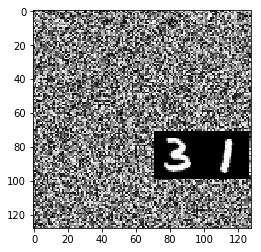

[2.3481909e-04 1.8551898e-03 5.2583992e-02 8.2626814e-01 2.6399772e-05
 1.0046190e-01 2.9485233e-04 1.5631152e-02 2.4453092e-03 1.9825998e-04]

[4.3214965e-05 9.8009574e-01 6.9257621e-05 1.3985754e-04 8.1231482e-03
 8.8214707e-05 9.7268366e-04 6.2592654e-03 5.2241841e-04 3.6861966e-03]

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]

[3, 1]


In [22]:
nn = 461
pred = model.predict(x_test[nn].reshape(1,128,128,1))

show(x_test[nn])

for ii in pred[0]:
    print(ii)
    print()
    
print(pred[0].round())
print()
    
print([np.argmax(ii) for ii in pred[0]])


In [6]:
SAVE = False
if SAVE:
    model.save(path_model)